In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

resumeDataSet = pd.read_csv('cleaned_resume_dataset.csv' ,encoding='utf-8')
resumeDataSet['cleaned_resume'] = ''
resumeDataSet.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",


In [2]:
resumeDataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Category        962 non-null    object
 1   Resume          962 non-null    object
 2   cleaned_resume  962 non-null    object
dtypes: object(3)
memory usage: 22.7+ KB


In [3]:
print ("Displaying the distinct categories of resume:\n\n ")
print (resumeDataSet['Category'].unique())

Displaying the distinct categories of resume:

 
['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


In [4]:
print ("Displaying the distinct categories of resume and the number of records belonging to each category:\n\n")
print (resumeDataSet['Category'].value_counts())

Displaying the distinct categories of resume and the number of records belonging to each category:


Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Mechanical Engineer          40
Blockchain                   40
Data Science                 40
ETL Developer                40
Operations Manager           40
Arts                         36
Database                     33
Health and fitness           30
Electrical Engineering       30
PMO                          30
DotNet Developer             28
Business Analyst             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: Category, dtype: int64


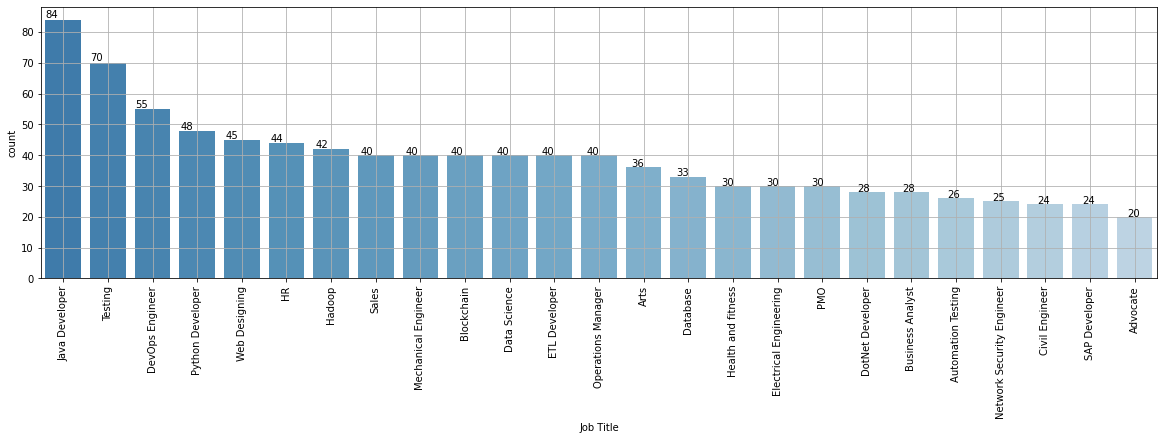

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calculate the counts and sort them in descending order
category_order = resumeDataSet['Category'].value_counts().index

# Create a color palette with a gradient from dark blue to grey
# The gradient now starts with dark blue (0.7) and goes to lighter (0.3)
num_categories = len(category_order)
colors = plt.cm.Blues(np.linspace(0.7, 0.3, num_categories))

# Plot with the sorted categories and the custom color palette
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
ax = sns.countplot(x="Category", data=resumeDataSet, order=category_order, palette=colors)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01, p.get_height() * 1.01))

# Set the label for the x-axis
ax.set_xlabel('Job Title')

plt.grid()



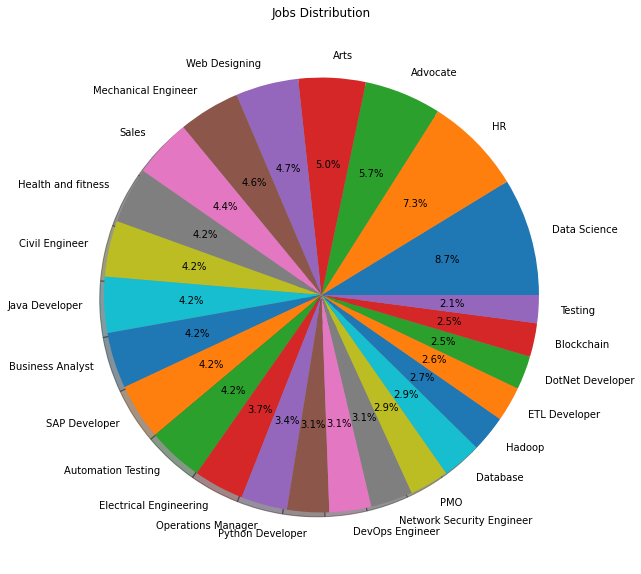

In [19]:
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt

targetCounts = resumeDataSet['Category'].value_counts()
targetLabels = resumeDataSet['Category'].unique()

# Make square figures and axes
plt.figure(1, figsize=(22,22))
the_grid = GridSpec(2, 2)

cmap = plt.get_cmap('coolwarm')
plt.subplot(the_grid[0, 1], aspect=1, title='Jobs Distribution')

source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True)

# Save the figure before showing it
plt.savefig('category_distribution_pie_chart.png')

# Now show the plot
plt.show()


In [20]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText
    
resumeDataSet['cleaned_resume'] = resumeDataSet.Resume.apply(lambda x: cleanResume(x))

In [21]:
resumeDataSet.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [22]:
resumeDataSet_d=resumeDataSet.copy()

In [23]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = resumeDataSet['Resume'].values
cleanedSentences = ""
for records in Sentences:
    cleanedText = cleanResume(records)
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)



[('Exprience', 3829), ('months', 3233), ('company', 3130), ('Details', 2967), ('description', 2634), ('1', 2134), ('Project', 1808), ('project', 1579), ('6', 1499), ('data', 1438), ('team', 1424), ('Maharashtra', 1385), ('year', 1244), ('Less', 1137), ('January', 1086), ('using', 1041), ('Skill', 1018), ('Pune', 1016), ('Management', 1010), ('SQL', 990), ('Ltd', 934), ('management', 927), ('C', 896), ('Engineering', 855), ('Education', 833), ('Developer', 806), ('Java', 773), ('2', 754), ('development', 752), ('monthsCompany', 746), ('Pvt', 730), ('application', 727), ('System', 715), ('reports', 697), ('business', 696), ('India', 693), ('requirements', 693), ('I', 690), ('various', 688), ('A', 688), ('Data', 674), ('The', 672), ('University', 656), ('process', 648), ('Testing', 646), ('test', 638), ('Responsibilities', 637), ('system', 636), ('testing', 634), ('Software', 632)]


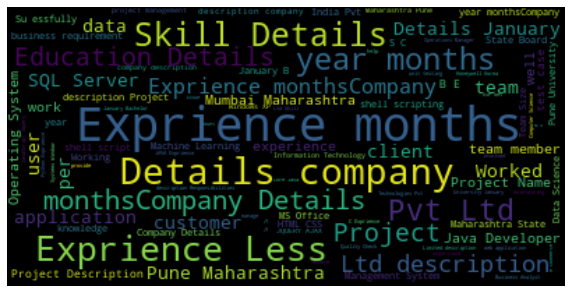

In [26]:
wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

# Show the plot
plt.show()


In [31]:
from transformers import DistilBertForSequenceClassification, DistilBertTokenizer
from torch.utils.data import DataLoader, Dataset, random_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report
import torch
from torch.nn import CrossEntropyLoss

# Initialize the tokenizer and model
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=len(resumeDataSet['Category'].unique()))

# Create a mapping of labels to numerical values
label_mapping = {label: idx for idx, label in enumerate(resumeDataSet['Category'].unique())}

class CustomDataset(Dataset):
    def __init__(self, dataframe, label_mapping):
        self.data = dataframe
        self.label_mapping = label_mapping
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        input_text = self.data.iloc[index]['cleaned_resume']
        label = self.data.iloc[index]['Category']
        label = torch.tensor(self.label_mapping[label], dtype=torch.long)
        inputs = tokenizer(input_text, padding='max_length', truncation=True, max_length=512, return_tensors='pt')
        input_ids = inputs['input_ids'].squeeze()
        attention_mask = inputs['attention_mask'].squeeze()
        return input_ids, attention_mask, label

# Split the dataset
train_ratio = 0.8
valid_ratio = 0.1
test_ratio = 0.1
total_size = len(resumeDataSet)
train_size = int(train_ratio * total_size)
valid_size = int(valid_ratio * total_size)
test_size = total_size - train_size - valid_size
train_dataset_raw, valid_dataset_raw, test_dataset_raw = random_split(resumeDataSet, [train_size, valid_size, test_size])

# Convert the raw datasets into CustomDataset
train_dataset = CustomDataset(train_dataset_raw.dataset.iloc[train_dataset_raw.indices].reset_index(drop=True), label_mapping)
valid_dataset = CustomDataset(valid_dataset_raw.dataset.iloc[valid_dataset_raw.indices].reset_index(drop=True), label_mapping)
test_dataset = CustomDataset(test_dataset_raw.dataset.iloc[test_dataset_raw.indices].reset_index(drop=True), label_mapping)

# Create DataLoaders
train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)
valid_dataloader = DataLoader(valid_dataset, batch_size=16)
test_dataloader = DataLoader(test_dataset, batch_size=16)

# Define the optimizer and loss function
optimizer = AdamW(model.parameters(), lr=2e-5, weight_decay=1e-5)
criterion = CrossEntropyLoss()

# Training and evaluation loop
epochs = 4
l1_lambda = 1e-5
accumulation_steps = 4

for epoch in range(epochs):
    # Training loop
    model.train()
    train_loss = 0.0
    all_train_preds = []
    all_train_labels = []
    for i, batch in enumerate(train_dataloader):
        input_ids, attention_mask, labels = batch
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        loss = criterion(logits, labels) + l1_lambda * sum(torch.norm(param, 1) for param in model.parameters())
        loss = loss / accumulation_steps
        loss.backward()
        if (i+1) % accumulation_steps == 0:
            optimizer.step()
            optimizer.zero_grad()
        train_loss += loss.item()
        preds = torch.argmax(logits, dim=1).cpu().numpy()
        labels = labels.cpu().numpy()
        all_train_preds.extend(preds)
        all_train_labels.extend(labels)
    
    # Calculate and print training metrics
    train_accuracy = accuracy_score(all_train_labels, all_train_preds)
    train_precision, train_recall, train_f1, _ = precision_recall_fscore_support(all_train_labels, all_train_preds, average='weighted')
    print(f"Epoch {epoch+1}/{epochs}")
    print(f"Training Loss: {train_loss/len(train_dataloader):.4f}, Training Accuracy: {train_accuracy:.4f}, Training Precision: {train_precision:.4f}, Training Recall: {train_recall:.4f}, Training F1-score: {train_f1:.4f}")

    # Validation loop
    model.eval()
    valid_loss = 0.0
    all_preds = []
    all_labels = []
    for batch in valid_dataloader:
        input_ids, attention_mask, labels = batch
        with torch.no_grad():
            outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        loss = criterion(logits, labels)
        valid_loss += loss.item()
        preds = torch.argmax(logits, dim=1).cpu().numpy()
        labels = labels.cpu().numpy()
        all_preds.extend(preds)
        all_labels.extend(labels)
    accuracy = accuracy_score(all_labels, all_preds)
    precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='weighted')
    print(f"Validation Loss: {valid_loss/len(valid_dataloader):.4f}, Validation Accuracy: {accuracy:.4f}, Validation Precision: {precision:.4f}, Validation Recall: {recall:.4f}, Validation F1-score: {f1:.4f}\n")

# Test loop
model.eval()
test_loss = 0.0
all_test_preds = []
all_test_labels = []
for batch in test_dataloader:
    input_ids, attention_mask, labels = batch
    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)
    logits = outputs.logits
    loss = criterion(logits, labels)
    test_loss += loss.item()
    preds = torch.argmax(logits, dim=1).cpu().numpy()
    labels = labels.cpu().numpy()
    all_test_preds.extend(preds)
    all_test_labels.extend(labels)

# Calculate and print test metrics
test_accuracy = accuracy_score(all_test_labels, all_test_preds)
test_precision, test_recall, test_f1, _ = precision_recall_fscore_support(all_test_labels, all_test_preds, average='weighted')
print(f"Test Loss: {test_loss/len(test_dataloader):.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test F1-score: {test_f1:.4f}\n")
print("Classification Report:")
print(classification_report(all_test_labels, all_test_preds))


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classi

Epoch 1/4
Training Loss: 7.3099, Training Accuracy: 0.0793, Training Precision: 0.1267, Training Recall: 0.0793, Training F1-score: 0.0493
Validation Loss: 3.1602, Validation Accuracy: 0.1042, Validation Precision: 0.0120, Validation Recall: 0.1042, Validation F1-score: 0.0215

Epoch 2/4
Training Loss: 7.2708, Training Accuracy: 0.1430, Training Precision: 0.0821, Training Recall: 0.1430, Training F1-score: 0.0775
Validation Loss: 3.0242, Validation Accuracy: 0.1458, Validation Precision: 0.1285, Validation Recall: 0.1458, Validation F1-score: 0.0851

Epoch 3/4
Training Loss: 7.2023, Training Accuracy: 0.3017, Training Precision: 0.3291, Training Recall: 0.3017, Training F1-score: 0.2257
Validation Loss: 2.7794, Validation Accuracy: 0.3021, Validation Precision: 0.2881, Validation Recall: 0.3021, Validation F1-score: 0.2304

Epoch 4/4
Training Loss: 7.1163, Training Accuracy: 0.4356, Training Precision: 0.4579, Training Recall: 0.4356, Training F1-score: 0.3665
Validation Loss: 2.4731,

In [15]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    resumeDataSet[i] = le.fit_transform(resumeDataSet[i])

In [ ]:
resumeDataSet.head()

In [ ]:
resumeDataSet.Category.value_counts()

In [ ]:
resumeDataSet_d.Category.value_counts() #understanding decode LabelEncoder

In [ ]:
del resumeDataSet_d #clearing the space occupied 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

requiredText = resumeDataSet['cleaned_resume'].values
requiredTarget = resumeDataSet['Category'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english')
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print ("Feature completed .....")

X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=42, test_size=0.2,
                                                 shuffle=True, stratify=requiredTarget)
print(X_train.shape)
print(X_test.shape)

In [ ]:
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set:     {:.2f}'.format(clf.score(X_test, y_test)))



In [ ]:
print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

resumeDataSet = pd.read_csv('../input/resume-dataset/UpdatedResumeDataSet.csv' ,encoding='utf-8')
resumeDataSet['cleaned_resume'] = ''
resumeDataSet.head()

print ("Displaying the distinct categories of resume:\n\n ")
print (resumeDataSet['Category'].unique())

print ("Displaying the distinct categories of resume and the number of records belonging to each category:\n\n")
print (resumeDataSet['Category'].value_counts())

import seaborn as sns
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
ax=sns.countplot(x="Category", data=resumeDataSet)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.grid()


from matplotlib.gridspec import GridSpec
targetCounts = resumeDataSet['Category'].value_counts()
targetLabels  = resumeDataSet['Category'].unique()
# Make square figures and axes
plt.figure(1, figsize=(22,22))
the_grid = GridSpec(2, 2)


cmap = plt.get_cmap('coolwarm')
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')

source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True)
plt.show()


import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText
    
resumeDataSet['cleaned_resume'] = resumeDataSet.Resume.apply(lambda x: cleanResume(x))


resumeDataSet_d=resumeDataSet.copy()

import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = resumeDataSet['Resume'].values
cleanedSentences = ""
for records in Sentences:
    cleanedText = cleanResume(records)
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)



wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()



!pip install transformers
import torch
from torch.utils.data import DataLoader, TensorDataset, random_split
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
